In [1]:
#other notes:
#https://stats.stackexchange.com/questions/17109/measuring-entropy-information-patterns-of-a-2d-binary-matrix/17556#17556
    
#https://github.com/edouardoyallon/pyscatwave
import numpy as np
from matplotlib import pyplot as plt
from skimage import io
%matplotlib inline
# nar  = np.load("../../sample_data/texture/out/p1_0000.coef.npy")
# nar_other  = np.load("../../sample_data/texture/out/p8_7001.coef.npy")

In [2]:
def as_density(ar,plot=False,bins=10):
    ar /= ar.max()
    h,b = np.histogram(ar, bins=bins)
    h = np.array(h).astype(float)
    h /= h.max()
    if plot:   plt.plot(b[:-1],h)
    return (h,b)

def filter_diff_density(a,b):
    return scipy.stats.entropy(as_density(a)[0],as_density(b)[0]).mean()

def load_filter(p, i, f):
    offset = (p-1)
    fname = "../../sample_data/texture/out/p{}_{}{:0>3}.coef.npy".format(p,offset,i)
    #return fname
    print(fname)
    return np.load(fname)[0][0][f]

def plot_filter(p,i, f):
    im = load_filter(p,i,f)
    #plt.figure(figsize=(20,10))
    plt.imshow(im)
    
def plot_filter_3d(p,i,f):
    from mpl_toolkits.mplot3d import Axes3D
    import matplotlib.pyplot as plt
    import numpy as np

    image =  load_filters(p,i)[0][0][f]
    
    B = np.histogram(image, normed=False)[0]

    pd.DataFrame([B]).T.plot()


    X = np.arange(0, image.shape[1], 1)
    Y = np.arange(0, image.shape[0], 1)
    X, Y = np.meshgrid(X, Y)
    Z = image
    fig = plt.figure(figsize=(20,10))
    ax = fig.gca(projection='3d')
    #ax.set_axis_off()
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='spectral', linewidth=0, antialiased=False)

In [10]:
A = load_filter(1,0,14)
B = load_filter(5,0,14)
#scipy.stats.entropy(A,B).mean()

../../sample_data/texture/out/p1_0000.coef.npy
../../sample_data/texture/out/p5_4000.coef.npy


In [11]:
filter_diff_density(A,B)

0.1255266614294132

In [346]:
as_density(A)

(array([0.16923077, 0.52820513, 0.8       , 1.        , 0.91282051,
        0.68717949, 0.54871795, 0.38974359, 0.16923077, 0.04615385]),
 array([0.05694474, 0.15125027, 0.24555579, 0.33986132, 0.43416685,
        0.52847237, 0.6227779 , 0.71708342, 0.81138895, 0.90569447,
        1.        ]))

In [350]:


filter_diff_density(A,B)

0.5212091590949594

(array([0.16923077, 0.52820513, 0.8       , 1.        , 0.91282051,
        0.68717949, 0.54871795, 0.38974359, 0.16923077, 0.04615385]),
 array([0.05694474, 0.15125027, 0.24555579, 0.33986132, 0.43416685,
        0.52847237, 0.6227779 , 0.71708342, 0.81138895, 0.90569447,
        1.        ]))

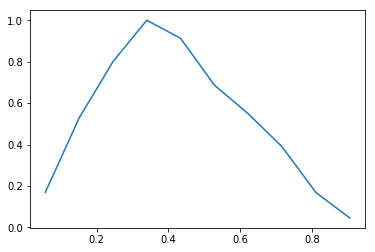

In [348]:
as_density(A,plot=True)

(array([0.16923077, 0.52820513, 0.8       , 1.        , 0.91282051,
        0.68717949, 0.54871795, 0.38974359, 0.16923077, 0.04615385]),
 array([0.05694474, 0.15125027, 0.24555579, 0.33986132, 0.43416685,
        0.52847237, 0.6227779 , 0.71708342, 0.81138895, 0.90569447,
        1.        ]))

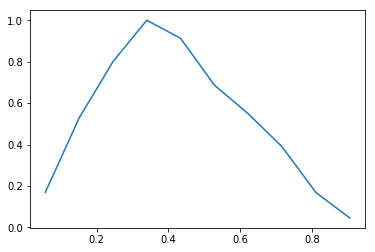

In [344]:
as_density(B,plot=True)

In [275]:
load_filter(1,1,1).sum()

../../sample_data/texture/out/p1_0001.coef.npy


1284077.2

../../sample_data/texture/out/p1_0009.coef.npy


C:\Users\mrsir\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


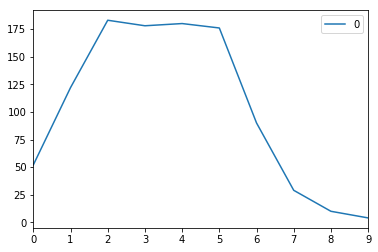

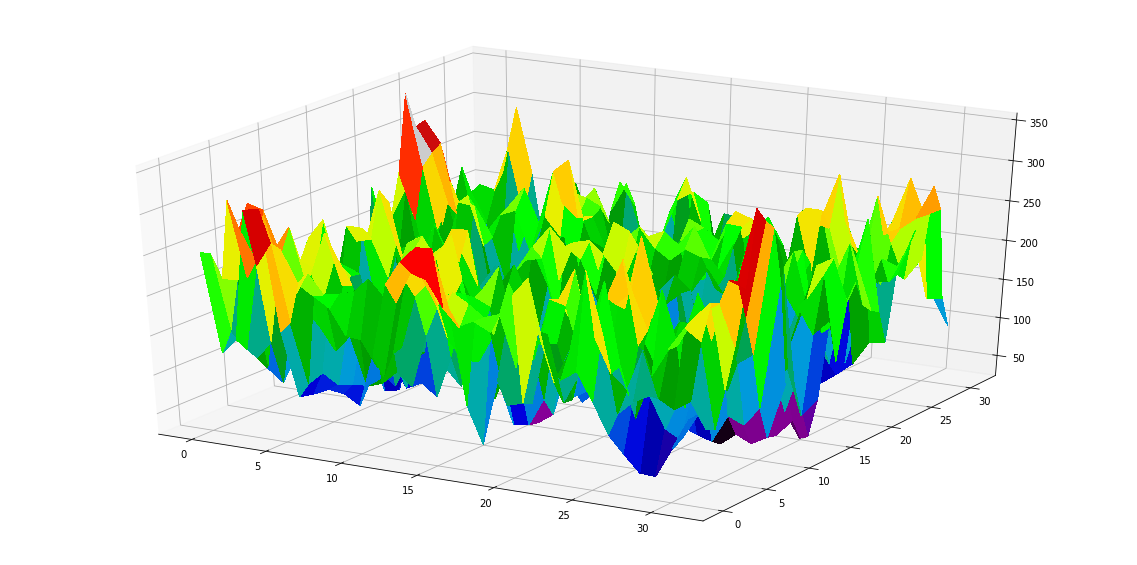

In [221]:
plot_filter_3d(1,9, 5)

../../sample_data/texture/out/p2_1009.coef.npy


C:\Users\mrsir\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


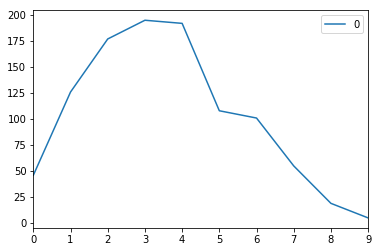

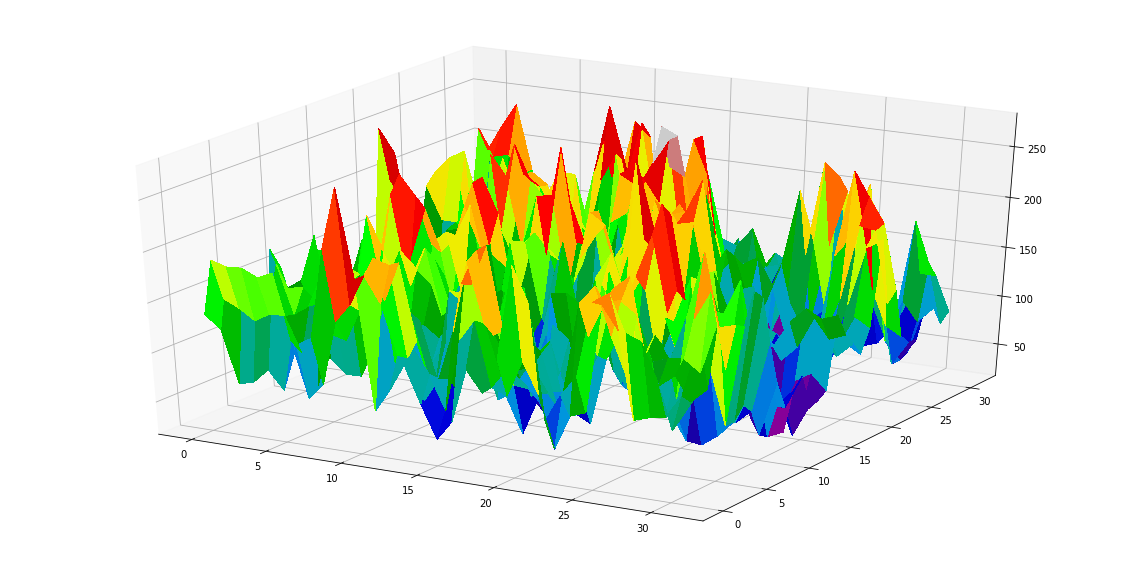

In [222]:
plot_filter_3d(2,9, 5)

../../sample_data/texture/out/p8_7018.coef.npy


C:\Users\mrsir\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


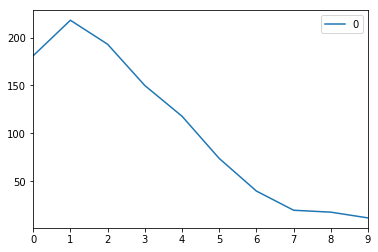

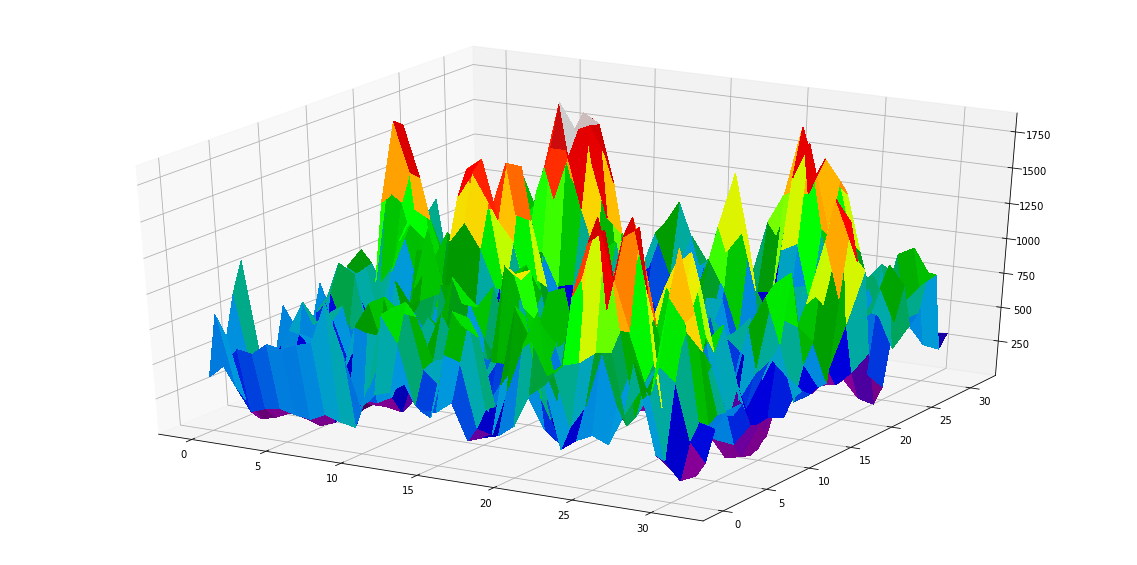

In [230]:
plot_filter_3d(8,18, 13)

inf

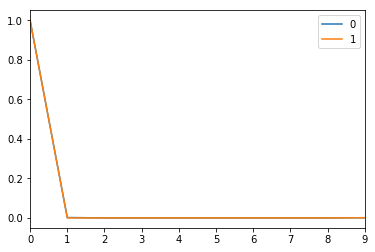

In [270]:
nar  = np.load("../../sample_data/texture/out/p1_0000.coef.npy")
nar_other  = np.load("../../sample_data/texture/out/p7_6001.coef.npy")

n1,n2 = nar,nar_other
i=10
pim1 = n1[0][0][i]
pim1 = np.absolute(np.fft.fft2(pim1))
#pim1 /= pim1.sum() #div by sum to make a desnity
#pim1 = pim1.sum(0)
pim2 = n2[0][0][i]
pim2 = np.absolute(np.fft.fft2(pim2))
#pim2 /= pim2.sum() # dib by sum to make a density
#pim2 = pim2.sum(0)
#This routine will normalize pk and qk if they don’t sum to 1.
A = np.array(np.histogram(pim1,normed=False)[0])
B = np.array(np.histogram(pim2, normed=False)[0])
A = A/A.max()
B = B/B.max()

df = pd.DataFrame([A,B]).T
df.plot()
scipy.stats.entropy(A,B)#.mean()

In [271]:
df

,0,1
0,1.000000,1.000000
1,0.001959,0.000000
2,0.000000,0.000000
3,0.000000,0.000000
4,0.000000,0.000000
5,0.000000,0.000000
6,0.000000,0.000000
7,0.000000,0.000000
8,0.000000,0.000000
9,0.000979,0.000978


In [60]:
#scipy.stats.entropy(pim1,pim2)

In [97]:
pim2

array([[9.8542778e-06, 3.8436228e-05, 1.3680027e-03, ..., 4.7127833e-05,
        1.9659887e-03, 3.3660370e-03],
       [1.7194021e-04, 2.5471956e-05, 1.4348891e-04, ..., 3.1289193e-04,
        8.3423307e-04, 2.8507975e-03],
       [2.1387944e-03, 1.1266121e-03, 1.0392318e-03, ..., 7.2463264e-04,
        4.8239730e-05, 1.3675629e-03],
       ...,
       [2.6116888e-03, 2.0716018e-03, 4.0740392e-04, ..., 1.6871819e-03,
        2.6025255e-03, 1.7115240e-03],
       [6.3203421e-04, 1.5797482e-03, 3.4770145e-04, ..., 1.8968914e-03,
        1.1605844e-03, 6.2724452e-05],
       [1.5883723e-05, 5.8108807e-04, 1.7427908e-03, ..., 9.1285394e-05,
        2.4759991e-04, 2.1497674e-04]], dtype=float32)

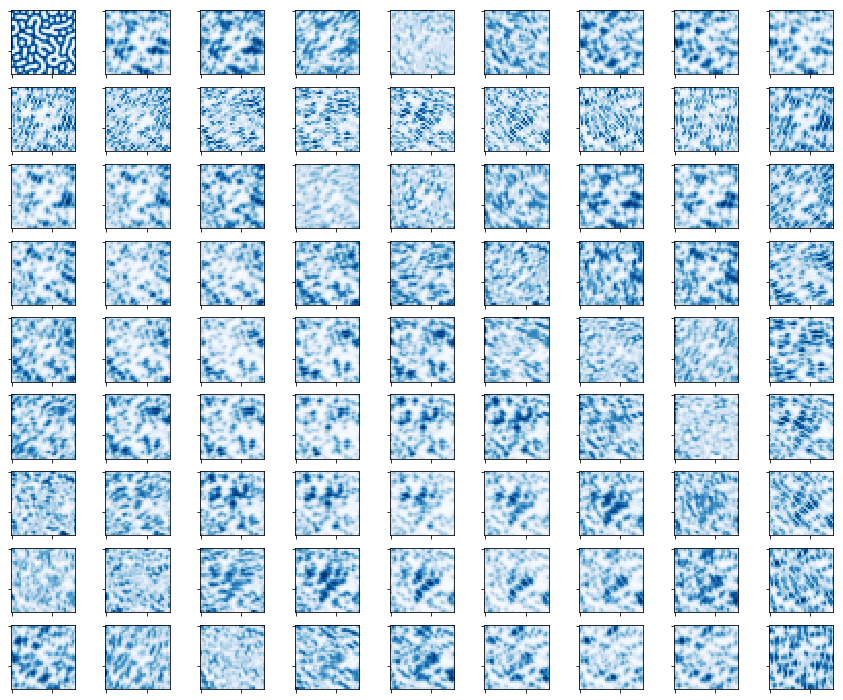

In [160]:
divs = 9
f, axarr = plt.subplots(divs,divs,figsize=(15,12.5))
plt.axis('on')#
counter = 0;
for x in range(divs):
    for y in range(divs):
        
        AX = axarr[y,x]
        AX.set_xticklabels([])
        AX.set_yticklabels([])
        
        AX.imshow(nar_other[0][0][counter], 'Blues')
        counter +=1

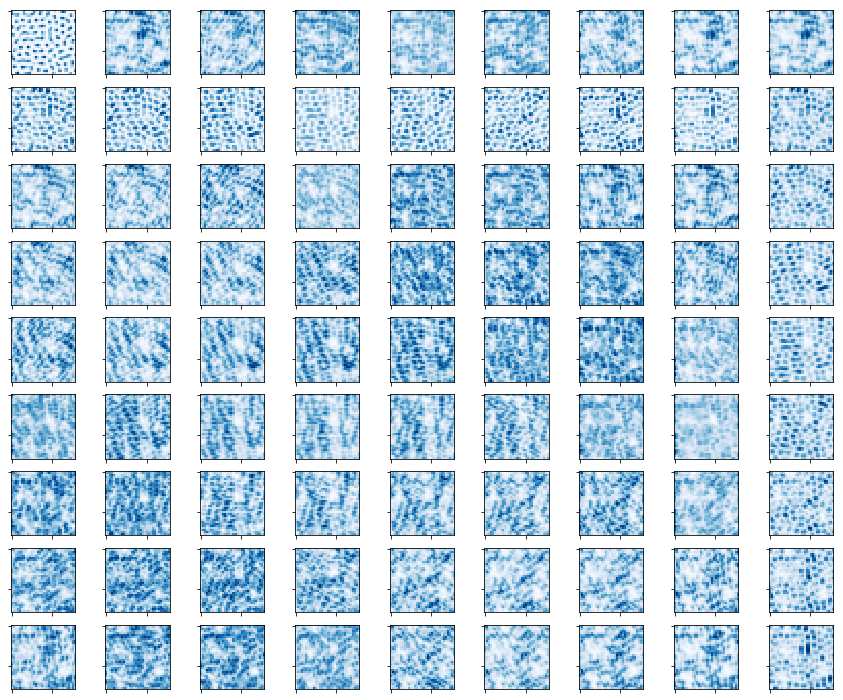

In [152]:
divs = 9
f, axarr = plt.subplots(divs,divs,figsize=(15,12.5))
plt.axis('on')#
counter = 0;
for x in range(divs):
    for y in range(divs):
        
        AX = axarr[y,x]
        AX.set_xticklabels([])
        AX.set_yticklabels([])
        
        AX.imshow(nar[0][0][counter], 'Blues')
        counter +=1

In [3]:
#TODO - what are statistics of these objects:
#FTs, 3d plots, distributions, log distributions,
import scipy.stats

In [46]:
from glob import glob 
from pathlib import Path
import scipy

import pandas as pd

def parition_set(root="../../sample_data/texture/out/*.npy"):
    d = {}
    for f in glob(root):
        p = Path(f)
        fname = p.parts[-1]
        class_name = fname.split("_")[0]
        if class_name not in d:
            d[class_name] = []
        d[class_name].append(f)
    return d

def kl_set(n1,n2,l=81):
    for i in range(l):
        pim1 = n1[0][0][i]
        
        pim2 = n2[0][0][i]
        
        #pim1 /= pim1.sum() #div by sum to make a desnity
        #pim2 /= pim2.sum() # dib by sum to make a density
        #This routine will normalize pk and qk if they don’t sum to 1.
        #I take the average of entropy cross sections
        # it sufficies as a try to check differences but requires serious consideration
        yield np.abs(pim1.sum()-pim2.sum()) # try comparing filter response
        #yield scipy.stats.entropy(pim1,pim2).mean() / 2 #this is a brutual approximation of a 2D entropy -
        #res= filter_diff_density(pim1, pim2)
        #yield res if np.isfinite(res) else 1
        
def key_name(f):
    p = Path(f)
    return p.parts[-1].split(".")[0]
    
def compare_sets(sets, a,b, func=kl_set, do_both=False):
    comparisons = []
    
    
    #intra
    if a == b or do_both:
        for s1 in sets[a]:
            for s2 in sets[a]:
                nar1  = np.load(s1)
                nar2  = np.load(s2)
                name1 = key_name(s1)
                name2 = key_name(s2)
                if s1 != s2:
                    comps = pd.DataFrame(list(func(nar1, nar2))).reset_index()
                    comps.columns = ["findex", "KL"]        
                    comps["type"] = "inter"
                    comps["source"] = name1
                    comps["target"] = name2
                    comparisons.append(comps)
                
    #inter
    if a != b or do_both:
        for s1 in sets[a][1:]: # just skip
            for s2 in sets[b][1:]: #just skip
                nar1  = np.load(s1)
                nar2  = np.load(s2)
                name1 = key_name(s1)
                name2 = key_name(s2)
                if s1 != s2:
                    comps = pd.DataFrame(list(func(nar1, nar2))).reset_index()
                    comps.columns = ["findex", "KL"]   
                    comps["type"] = "intra"
                    comps["source"] = name1
                    comps["target"] = name2
                    comparisons.append(comps)

    return pd.concat(comparisons)

sets = parition_set()


In [47]:
classes = ["p"+str(1+i) for i in range(8)]
classes

['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8']

In [48]:
#my_index

In [49]:
my_index = [0]
filters = list([1 for i in range(8)]) +  list([2 for i in range(8)]) 
counter = 1;
for i in range(16):
    my_index.append(1)
    counter += 1
    for j in range(16):
        if filters[i] < filters[j]:
            my_index.append(2)
            counter += 1
len(my_index)

81

In [50]:
#compare_sets(sets, classes[0],classes[1])

In [51]:
averages = []
for c in classes:
    for b in classes:
        result = compare_sets(sets, c,b)
        result = result.groupby(["source", "findex", "type"]).mean().reset_index()
        result = result.pivot("findex", "source")[["KL"]]
        average = result.mean(axis=1).reset_index() 
        average["level"] = my_index
        average = average.rename(columns={0:"KL"}).drop("findex",1)
        average = average.groupby("level").mean()
        average["source"] = c
        average["target"] = b
        averages.append(average.reset_index())
        #break
    #break
averages = pd.concat(averages)       
averages

,level,KL,source,target
0,0,1.950945e+05,p1,p1
1,1,1.219314e+05,p1,p1
2,2,1.451683e+04,p1,p1
0,0,7.790951e+06,p1,p2
1,1,3.200216e+05,p1,p2
2,2,2.998995e+04,p1,p2
0,0,7.678948e+06,p1,p3
1,1,8.308876e+05,p1,p3
2,2,9.770710e+04,p1,p3
0,0,1.586009e+07,p1,p4


In [53]:
c = 1/(2**(1/2))
c

0.7071067811865475

In [58]:
D = np.diagonal(l2)
D

array([0.06575613, 0.07986042, 0.23432292, 0.27037301, 0.20101921,
       0.1711106 , 0.17355728, 0.16682841])

'\\begin{tabular}{lrrrrrrrr}\n\\toprule\ntarget &    p1 &    p2 &    p3 &    p4 &    p5 &    p6 &    p7 &    p8 \\\\\nsource &       &       &       &       &       &       &       &       \\\\\n\\midrule\np1     &  0.07 &  0.13 &  0.79 &  0.74 &  0.97 &  0.97 &  0.97 &  0.97 \\\\\np2     &  0.14 &  0.08 &  0.84 &  0.74 &  1.00 &  1.00 &  1.00 &  1.00 \\\\\np3     &  0.44 &  0.46 &  0.23 &  0.30 &  0.47 &  0.50 &  0.52 &  0.54 \\\\\np4     &  0.44 &  0.43 &  0.31 &  0.27 &  0.51 &  0.53 &  0.55 &  0.57 \\\\\np5     &  0.86 &  0.87 &  0.76 &  0.78 &  0.20 &  0.20 &  0.19 &  0.21 \\\\\np6     &  0.89 &  0.90 &  0.82 &  0.82 &  0.21 &  0.17 &  0.19 &  0.18 \\\\\np7     &  0.95 &  0.95 &  0.91 &  0.92 &  0.21 &  0.20 &  0.17 &  0.18 \\\\\np8     &  1.00 &  1.00 &  1.00 &  1.00 &  0.25 &  0.20 &  0.19 &  0.17 \\\\\n\\bottomrule\n\\end{tabular}\n'

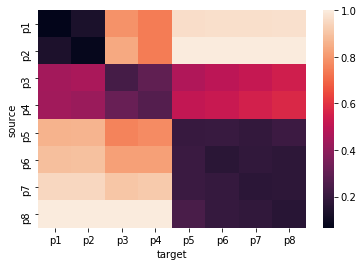

In [54]:
#averages.to_csv("gold.txt")
import seaborn as sns
l2 = averages[averages.level==2].pivot("source", "target", "KL")
l2 /= l2.max()
sns.heatmap(l2)
np.round(l2,2).to_latex()

In [97]:
L = np.round(l2,4)
L.to_latex()

'\\begin{tabular}{lrrrrrrrr}\n\\toprule\ntarget &      p1 &      p2 &      p3 &      p4 &      p5 &      p6 &      p7 &      p8 \\\\\nsource &         &         &         &         &         &         &         &         \\\\\n\\midrule\np1     &  0.0658 &  0.1319 &  0.7900 &  0.7436 &  0.9667 &  0.9681 &  0.9696 &  0.9711 \\\\\np2     &  0.1358 &  0.0799 &  0.8428 &  0.7423 &  1.0000 &  1.0000 &  1.0000 &  1.0000 \\\\\np3     &  0.4426 &  0.4585 &  0.2343 &  0.2981 &  0.4737 &  0.4972 &  0.5186 &  0.5440 \\\\\np4     &  0.4396 &  0.4262 &  0.3146 &  0.2704 &  0.5130 &  0.5257 &  0.5531 &  0.5741 \\\\\np5     &  0.8645 &  0.8685 &  0.7562 &  0.7760 &  0.2010 &  0.2049 &  0.1928 &  0.2145 \\\\\np6     &  0.8938 &  0.8966 &  0.8194 &  0.8209 &  0.2115 &  0.1711 &  0.1870 &  0.1768 \\\\\np7     &  0.9500 &  0.9515 &  0.9070 &  0.9166 &  0.2113 &  0.1985 &  0.1736 &  0.1785 \\\\\np8     &  1.0000 &  1.0000 &  1.0000 &  1.0000 &  0.2470 &  0.1972 &  0.1876 &  0.1668 \\\\\n\\bottomrule\n\\en

In [74]:
D = pd.DataFrame(np.diag(np.diagonal(L)))
D

,0,1,2,3,4,5,6,7
0,0.0658,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000
1,0.0000,0.0799,0.0000,0.0000,0.000,0.0000,0.0000,0.0000
2,0.0000,0.0000,0.2343,0.0000,0.000,0.0000,0.0000,0.0000
3,0.0000,0.0000,0.0000,0.2704,0.000,0.0000,0.0000,0.0000
4,0.0000,0.0000,0.0000,0.0000,0.201,0.0000,0.0000,0.0000
5,0.0000,0.0000,0.0000,0.0000,0.000,0.1711,0.0000,0.0000
6,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.1736,0.0000
7,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.1668


In [80]:
ML = pd.DataFrame(D.sum(axis=1))
ML.columns = ["D"]

In [90]:
OD = pd.DataFrame(L.as_matrix() - D.as_matrix())
ODM = pd.DataFrame(OD.mean(axis=1))
ODM.columns = ["OD"]
ODM = ODM.join(pd.DataFrame(OD.std(axis=1)))
ODM.columns = ["OD", "ODV"]

ODM

,OD,ODV
0,0.692625,0.398477
1,0.715113,0.412081
2,0.404087,0.179351
3,0.418288,0.188677
4,0.484675,0.362837
5,0.500750,0.387855
6,0.539175,0.424414
7,0.578975,0.455662


In [98]:
RES = ML.join(ODM)
RES.to_latex()

'\\begin{tabular}{lrrr}\n\\toprule\n{} &       D &        OD &       ODV \\\\\n\\midrule\n0 &  0.0658 &  0.692625 &  0.398477 \\\\\n1 &  0.0799 &  0.715113 &  0.412081 \\\\\n2 &  0.2343 &  0.404087 &  0.179351 \\\\\n3 &  0.2704 &  0.418288 &  0.188677 \\\\\n4 &  0.2010 &  0.484675 &  0.362837 \\\\\n5 &  0.1711 &  0.500750 &  0.387855 \\\\\n6 &  0.1736 &  0.539175 &  0.424414 \\\\\n7 &  0.1668 &  0.578975 &  0.455662 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [96]:
RES["d"] = c * np.sqrt(np.power((0-RES["OD"]),2) + np.power((1-RES["OD"]), 2))
RES

,D,OD,ODV,d
0,0.0658,0.692625,0.398477,0.535821
1,0.0799,0.715113,0.412081,0.544310
2,0.2343,0.404087,0.179351,0.509116
3,0.2704,0.418288,0.188677,0.506633
4,0.2010,0.484675,0.362837,0.500235
5,0.1711,0.500750,0.387855,0.500001
6,0.1736,0.539175,0.424414,0.501532
7,0.1668,0.578975,0.455662,0.506199


In [44]:
averages = pd.read_csv("./gold.txt").drop("Unnamed: 0",1)
averages

,level,KL,source,target
0,0,0.710099,p1,p1
1,1,0.201405,p1,p1
2,2,0.101218,p1,p1
3,0,0.519261,p1,p2
4,1,0.175296,p1,p2
5,2,0.107152,p1,p2
6,0,0.674231,p1,p3
7,1,0.214382,p1,p3
8,2,0.133889,p1,p3
9,0,0.535779,p1,p4


target,p1,p2,p3,p4,p5,p6,p7,p8
source,,,,,,,,
p1,0.10,0.11,0.13,0.14,0.14,0.14,0.15,0.14
p2,0.11,0.11,0.14,0.15,0.15,0.15,0.15,0.15
p3,0.13,0.13,0.16,0.16,0.17,0.17,0.17,0.17
p4,0.13,0.14,0.16,0.17,0.17,0.17,0.18,0.17
p5,0.13,0.14,0.16,0.17,0.17,0.17,0.17,0.17
p6,0.13,0.14,0.17,0.17,0.17,0.17,0.18,0.18
p7,0.13,0.14,0.17,0.17,0.17,0.18,0.18,0.18
p8,0.13,0.14,0.17,0.17,0.17,0.17,0.18,0.18


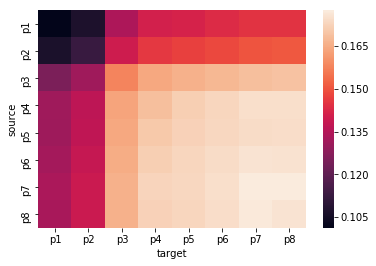

In [45]:
#averages.to_csv("gold.txt")
l2 = averages[averages.level==2].pivot("source", "target", "KL")
sns.heatmap(l2)
np.round(l2,2)#.to_latex()

In [36]:
l2.to_latex()

'\\begin{tabular}{lrrrrrrrr}\n\\toprule\ntarget &        p1 &        p2 &        p3 &        p4 &        p5 &        p6 &        p7 &        p8 \\\\\nsource &           &           &           &           &           &           &           &           \\\\\n\\midrule\np1     &  0.064915 &  0.120228 &  0.094431 &  0.152543 &  0.117281 &  0.129254 &  0.125863 &  0.118198 \\\\\np2     &  0.109982 &  0.077169 &  0.099357 &  0.094594 &  0.110796 &  0.095701 &  0.113292 &  0.094749 \\\\\np3     &  0.097907 &  0.114797 &  0.074025 &  0.102342 &  0.085005 &  0.083748 &  0.087508 &  0.076211 \\\\\np4     &  0.155303 &  0.108302 &  0.098080 &  0.074947 &  0.096210 &  0.075593 &  0.094672 &  0.074646 \\\\\np5     &  0.116368 &  0.123659 &  0.080206 &  0.096088 &  0.078266 &  0.079851 &  0.078991 &  0.072363 \\\\\np6     &  0.134041 &  0.110505 &  0.081784 &  0.076222 &  0.081824 &  0.066338 &  0.080843 &  0.062567 \\\\\np7     &  0.122571 &  0.123552 &  0.079512 &  0.091158 &  0.075278 &  0.0756

In [22]:
l1 = averages[averages.level==1].pivot("source", "target", "KL")


In [30]:
result = compare_sets(sets, "p8", "p1", do_both=True)

In [31]:
grps = result.groupby(["source", "findex", "type"]).mean().reset_index()
inters = grps[grps.type=="inter"].pivot("findex", "source")["KL"]
intras = grps[grps.type=="intra"].pivot("findex", "source")["KL"]


In [32]:
# average = inters.mean(axis=1).reset_index() / 2
# average["level"] = my_index
# average.groupby("level").mean()

Text(0.5,1,'Inter-class P8,P8')

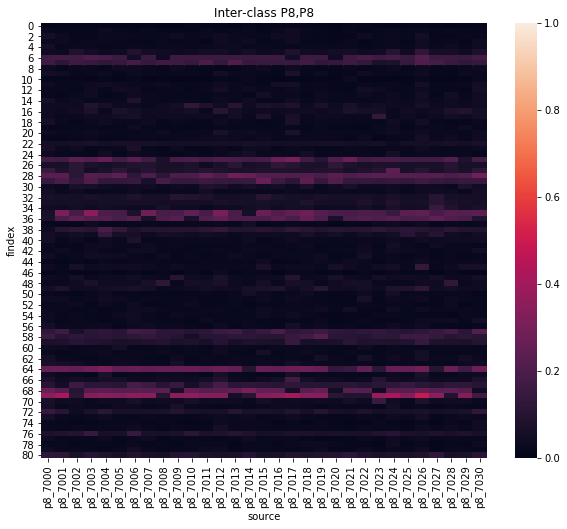

In [33]:
import seaborn as sns

plt.figure(figsize=(10,8))
ax = plt.axes()
sns.heatmap(inters,ax = ax,vmin=0, vmax=1)
ax.set_title('Inter-class P8,P8')


Text(0.5,1,'Between-classes P8,P1')

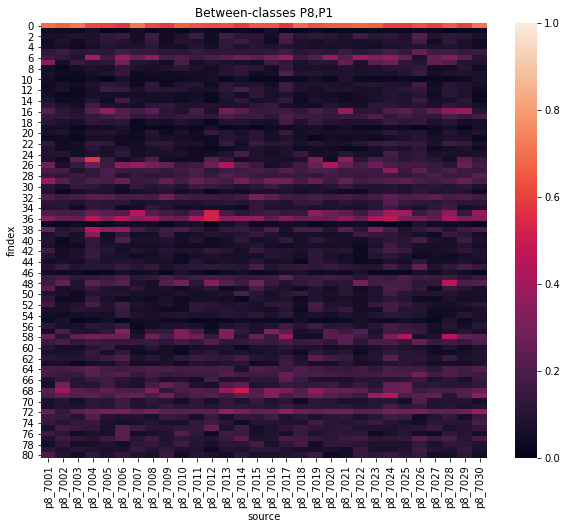

In [34]:
plt.figure(figsize=(10,8))
ax = plt.axes()
sns.heatmap(intras,ax = ax,vmin=0, vmax=1)
ax.set_title('Between-classes P8,P1')


In [ ]:
plt.figure()

nar  = np.load("../../sample_data/texture/out/p2_1020.coef.npy")

pim = nar[0][0][0]
pim /= pim.max()
pim2 = nar[0][0][1]
pim2 /= pim2.max()
plt.imshow(pim)

import lightroot
lightroot.io.stats(pim,xlim=None,ylim=None)

In [ ]:
paths = ["../../sample_data/texture/outscenes/p1/0000.png",
"../../sample_data/texture/outscenes/p2/1000.png",
"../../sample_data/texture/outscenes/p3/2000.png",
"../../sample_data/texture/outscenes/p4/3000.png",
"../../sample_data/texture/outscenes/p5/4000.png",
"../../sample_data/texture/outscenes/p6/5000.png",
"../../sample_data/texture/outscenes/p7/6000.png",
"../../sample_data/texture/outscenes/p8/7000.png"]

ims = []
for d in paths:
    ims.append(io.imread(d))

In [ ]:
f, axarr = plt.subplots(2,4,figsize=(20,8))
plt.axis('on')#
counter = 0;
for x in range(4):
    for y in range(2):
        
        AX = axarr[y,x]
        AX.set_xticklabels([])
        AX.set_yticklabels([])
        
        AX.imshow(ims[counter], "gray")
        counter +=1